In [2]:
import pandas as pd
import glob

# 1. 獲取所有CSV檔案的檔案路徑
# glob找尋符合的檔案
file_paths = glob.glob('./*.csv')

# 2. 讀取所有CSV檔案並存儲為DataFrame列表
dataframes = [pd.read_csv(file) for file in file_paths]

In [3]:
# 蒐集每個特徵的np.array
real = []; fake = []; feature_names = []
# 找遍所有的dataframe
for df in dataframes:
    labels = df['Label'].unique()   # [True, False]
    # 分成真實(True)和合成(False)兩類
    real_label = df[df['Label'] == labels[0]]
    fake_label = df[df['Label'] == labels[1]]

    columns = []    # 蒐集特徵
    for col in df.columns[1:-1]:
        if '_' in col:
            columns.append(col)
    
    name = columns[0].split('_')[0]
    feature_names.append(name)
    real.append(real_label[columns].values)
    fake.append(fake_label[columns].values)

print(feature_names)

['Chroma', 'Mel', 'mfcc', 'RMS', 'spectral', 'tonnetz', 'ZCR']


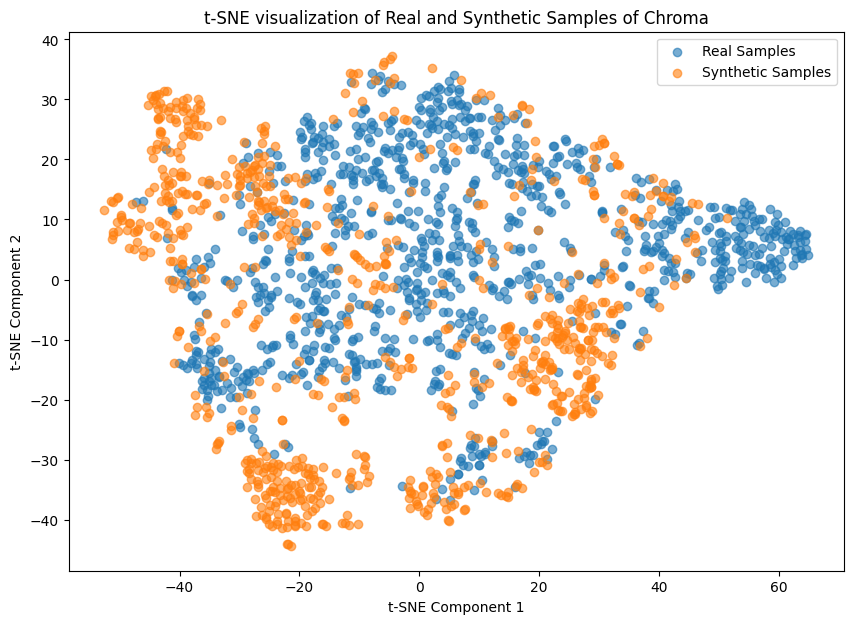

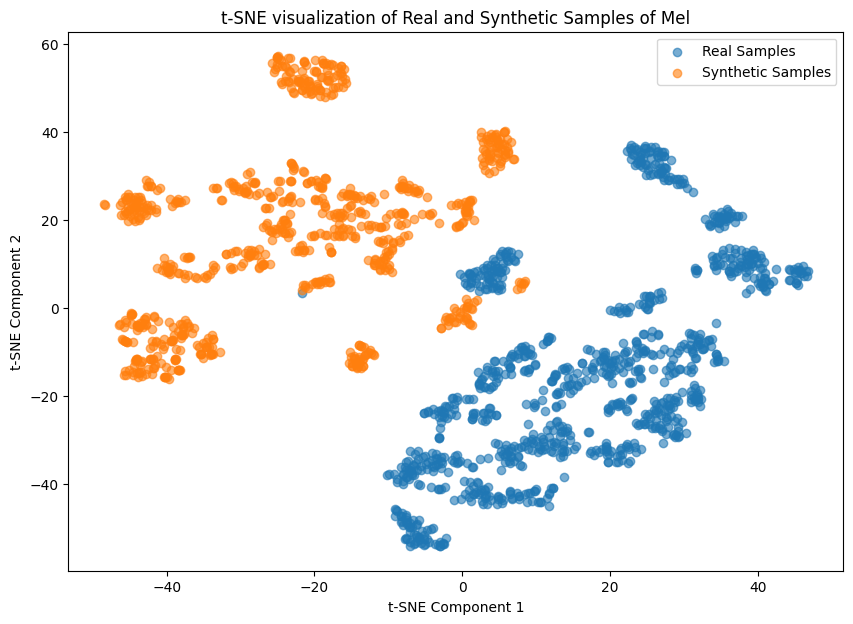

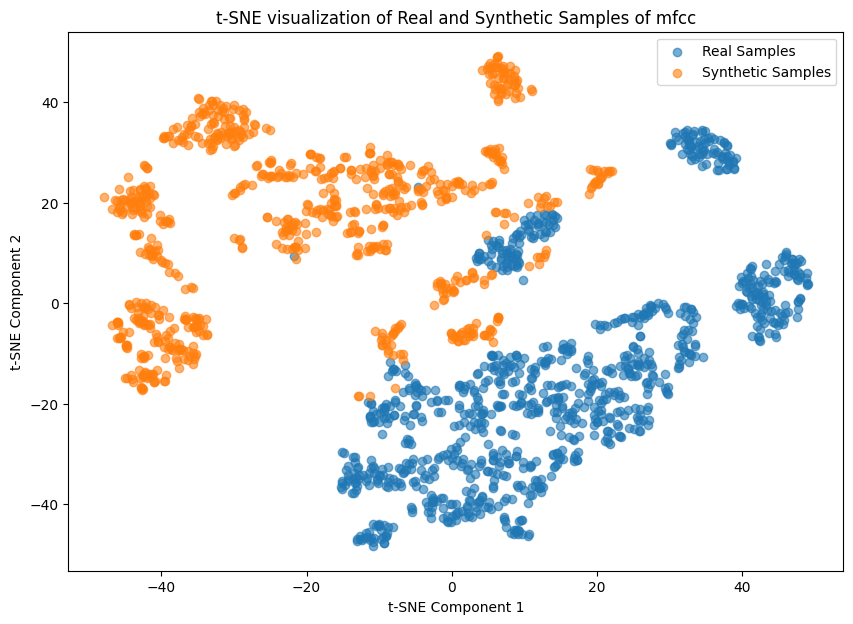

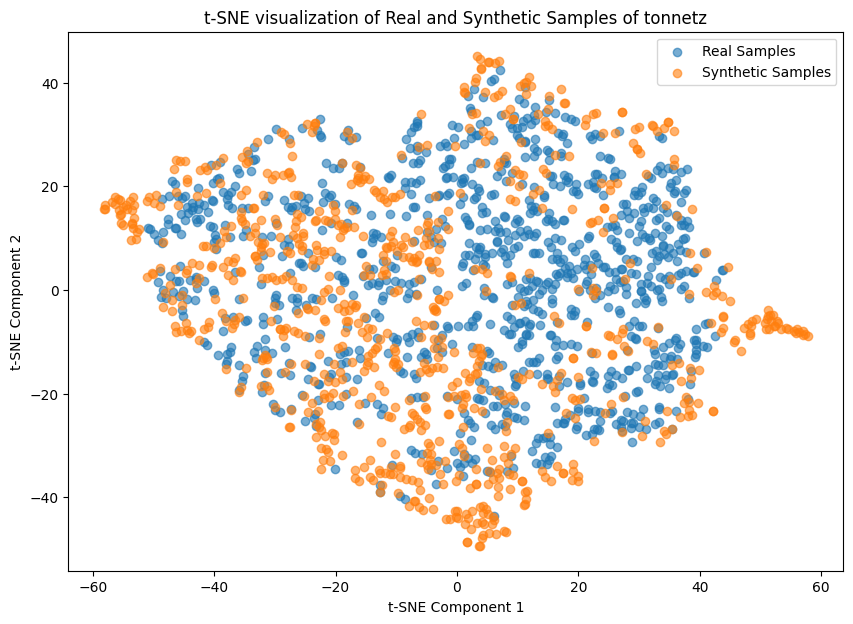

In [25]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# 初始化 t-SNE 模型
tsne = TSNE(n_components=2, random_state=42)
count =0
# 將數據降維
for real_data, fake_data, name in zip(real, fake, feature_names):
    X = np.vstack((real_data, fake_data))   # 按列合併
    y = np.hstack((np.ones(real_data.shape[0]), np.zeros(fake_data.shape[0])))
    if X.shape[1] < 2:  # 如果特徵數小於2，則不進行降維
        continue
    else:
        X_embedded = tsne.fit_transform(X)

    # 可視化結果
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label='Real Samples', alpha=0.6)
    plt.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label='Synthetic Samples', alpha=0.6)
    plt.legend()
    plt.title(f't-SNE visualization of Real and Synthetic Samples of {name}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()
    count +=1

結論: melspectrogram跟mfcc適合分析合成語音，但tonnetz和chroma不適合

* 組合兩個一維數據看散佈圖看看

In [6]:
one_dim = ['RMS.csv', 'sc.csv', 'zcr.csv']

In [13]:
dataframes = [pd.read_csv(file) for file in one_dim]
df = pd.concat(dataframes, axis=1)
# 保留每個欄位名的第一次出現
df = df.loc[:, ~df.columns.duplicated()]
# 顯示結果
df.head()

,Audio_name,RMS_1,Label,spectral_cendtroid_1,ZCR_1
0,A4_184.wav,0.041305,True,1649.564099,0.074960
1,A6_56.wav,0.038831,True,1418.468513,0.054872
2,A22_121.wav,0.027935,True,1938.664975,0.046605
3,A19_91.wav,0.025579,True,1276.225561,0.058828
4,A22_105.wav,0.099118,True,1560.264181,0.101109


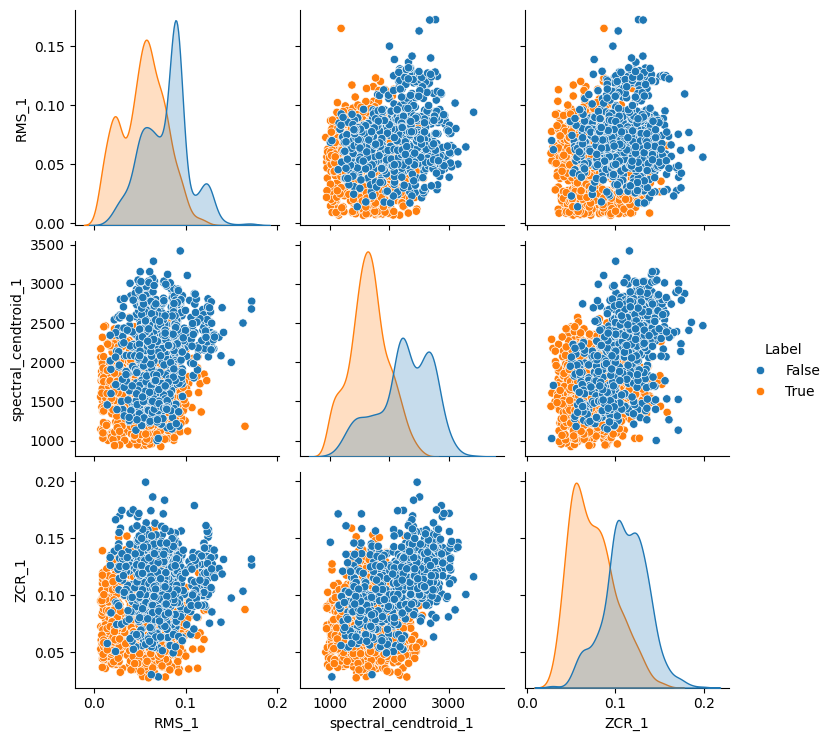

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# hue: 根據Label的值對數據進行分組

sns.pairplot(df, hue='Label')
plt.show()